# Twitter sentiment analysis of Covid-19 

# Importing libraries

In [1]:
! pip install tweepy

     |████████████████████████████████| 153kB 13.4MB/s eta 0:00:01


In [2]:
! pip install credentials

In [3]:
!pip install textblob

     |████████████████████████████████| 645kB 8.6MB/s eta 0:00:01


In [4]:
!pip install wordcloud

     |████████████████████████████████| 368kB 9.1MB/s eta 0:00:01


In [5]:
from wordcloud import WordCloud,STOPWORDS
import nltk
stopwords = set(STOPWORDS)

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob, Word, Blobber
import tweepy  # To consume Twitter's API
from IPython.display import display

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


# Reading Data

In [8]:
import types
from botocore.client import Config
import ibm_boto3

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_4 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-72fdcd28-8219-420e-8668-2c33628e6e16',
    'IBM_API_KEY_ID': '-tixDVTN1qPzxzCiZp28x3KQ5oT4_qbFY-sVef37Cs_I',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'sentimentanalysisofcovid19tweetsv-donotdelete-pr-tm57zkc1klvwtu',
    'FILE': '2020-03-29 Coronavirus Tweets.CSV'
}

def __iter__(self): return 0

client_44082b7511544aeb9c24a06f22afcbdf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-tixDVTN1qPzxzCiZp28x3KQ5oT4_qbFY-sVef37Cs_I',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_44082b7511544aeb9c24a06f22afcbdf.get_object(Bucket='sentimentanalysisofcovid19tweetsv-donotdelete-pr-tm57zkc1klvwtu',Key='2020-03-29 Coronavirus Tweets.CSV')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data = pd.read_csv(body)
df_data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1008,41,NaN,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,90,316,NaN,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,136,457,NaN,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1549,170,NaN,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,868,125,NaN,2016-10-19T22:05:03Z,False,es
5,1244051645710897155,132225222,2020-03-29T00:00:00Z,SSalud_mx,¡#Infórmate! #ConferenciaDePrensa sobre el #Co...,TweetDeck,NaN,NaN,NaN,False,...,49,NaN,NaN,NaN,812318,212,NaN,2010-04-12T16:53:45Z,True,es
6,1244051646935633921,27922157,2020-03-29T00:00:00Z,AmerMedicalAssn,.@PatriceHarrisMD spoke with @YahooFinance abo...,Sprinklr,NaN,NaN,NaN,False,...,3,NaN,NaN,NaN,714952,6877,NaN,2009-03-31T17:50:31Z,True,en
7,1244051645971025920,1115874631,2020-03-29T00:00:00Z,CGTNOfficial,First medical team aiding #Wuhan in fight agai...,Twitter Media Studio,NaN,NaN,NaN,False,...,18,NaN,NaN,NaN,14040072,55,NaN,2013-01-24T03:18:59Z,True,en
8,1244051646151380995,2547795564,2020-03-29T00:00:00Z,Alaraby_Sport,هكذا ساهم نجم كرة القدم العالمية والفرنسية، كي...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,36953,1003,NaN,2014-06-05T09:50:31Z,True,ar
9,1244051647149543426,108845320,2020-03-29T00:00:00Z,OnTopMag,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,Twitter for Advertisers,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,5042,5389,NaN,2010-01-27T05:23:15Z,False,en


In [9]:
# df_data = pd.read_csv('2020-03-29 Coronavirus Tweets.CSV')

In [9]:
# display columns
print(df_data.shape)
print(df_data.columns)

(564141, 22)
Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')


In [10]:
df=df_data.copy()
df.shape

(564141, 22)

# Data preprocessing and cleaning

In [11]:
# filtering data with 'country_code = IN'

df = df_data[(df_data.country_code == 'IN') & (df_data.lang == "en")].reset_index(drop = True)
#df = df_data_0[india]
df

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244052679157878784,117705199,2020-03-29T00:04:06Z,bennishiroor,"""#Covid19: #SocialDistancing the Indian way"" ...",Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Gulbarga, India",city,1985,1115,NaN,2010-02-26T10:19:25Z,False,en
1,1244052883953213440,3243798182,2020-03-29T00:04:55Z,lav_narayanan,Possible case of human to animal transmission ...,Twitter for Android,NaN,NaN,NaN,True,...,0,IN,"Chennai, India",city,1018,1980,NaN,2015-06-13T02:33:05Z,False,en
2,1244053492425093120,941635228832952320,2020-03-29T00:07:20Z,Amaresh03335514,"#Coronavirus: #US eclipses 120,000 confirmed c...",Twitter for Android,NaN,NaN,NaN,False,...,6,IN,"Varanasi, India",city,5580,3984,NaN,2017-12-15T11:45:08Z,False,en
3,1244053970395574273,243951016,2020-03-29T00:09:14Z,pandeyom,The bitter truth 😔\n#covid_19 #covid19india #l...,Instagram,NaN,NaN,NaN,False,...,0,IN,"Maharashtra, India",admin,82,299,NaN,2011-01-28T04:48:24Z,False,en
4,1244055001007300614,844702078748495874,2020-03-29T00:13:20Z,ThomasJ24632319,#CoronavirusOutbreak All Churches shd realize...,Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Kalyan Dombivali, India",city,1,2,NaN,2017-03-23T00:07:24Z,False,en
5,1244055221564657664,1243295317912514560,2020-03-29T00:14:12Z,SaveIndia___,"#CoronaUpdate\n#Italy 10000+, #USA\n2200+ &amp...",Twitter for Android,NaN,NaN,NaN,False,...,0,IN,"Chandigarh, India",city,1,24,NaN,2020-03-26T21:54:49Z,False,en
6,1244055695248375808,1217017676,2020-03-29T00:16:05Z,iFaridoon,DEATH count on March 28th 2020: \n\n1) Italy: ...,Twitter for Android,NaN,NaN,NaN,False,...,6,IN,"Mumbai, India",city,145380,332,NaN,2013-02-25T01:54:40Z,True,en
7,1244056162925809670,113954094,2020-03-29T00:17:57Z,drsankral,@ayush4bharat Very unfortunate to see this unp...,Twitter for Android,1.243927e+18,134099079.0,ayush4bharat,False,...,0,IN,"Rajendra Nagar, India",city,220,186,NaN,2010-02-13T15:55:10Z,False,en
8,1244057526598942720,878295048244404224,2020-03-29T00:23:22Z,AkulwarRavi,Two weeks ago and today \n#CoronaUpdate \n#Cor...,Twitter for Android,NaN,NaN,NaN,False,...,1,IN,"Kalyan Dombivali, India",city,24,562,NaN,2017-06-23T16:53:52Z,False,en
9,1244060513845346304,2775990588,2020-03-29T00:35:14Z,sgaurav12,I have made a small contribution towards my co...,Twitter for Android,NaN,NaN,NaN,False,...,1,IN,"Delhi, India",admin,136,529,NaN,2014-08-28T08:33:36Z,False,en


In [12]:
# dropping columns
df.drop(['status_id','country_code','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','lang','verified'],axis=1, inplace = True)
df.head()

,created_at,text,favourites_count,retweet_count
0,2020-03-29T00:04:06Z,"""#Covid19: #SocialDistancing the Indian way"" ...",10374,0
1,2020-03-29T00:04:55Z,Possible case of human to animal transmission ...,22880,0
2,2020-03-29T00:07:20Z,"#Coronavirus: #US eclipses 120,000 confirmed c...",12968,6
3,2020-03-29T00:09:14Z,The bitter truth 😔\n#covid_19 #covid19india #l...,6,0
4,2020-03-29T00:13:20Z,#CoronavirusOutbreak All Churches shd realize...,38,0


In [13]:
df.shape

(1574, 4)

In [14]:
# check missing values
df.isna().sum()

created_at          0
text                0
favourites_count    0
retweet_count       0
dtype: int64

In [15]:
# created_at column
df["created_at"] = df["created_at"].apply(lambda i:(int(i.split("T")[1].split(":")[0])+int(i.split("T")[1].split(":")[1])/60))
df.head()

,created_at,text,favourites_count,retweet_count
0,0.066667,"""#Covid19: #SocialDistancing the Indian way"" ...",10374,0
1,0.066667,Possible case of human to animal transmission ...,22880,0
2,0.116667,"#Coronavirus: #US eclipses 120,000 confirmed c...",12968,6
3,0.150000,The bitter truth 😔\n#covid_19 #covid19india #l...,6,0
4,0.216667,#CoronavirusOutbreak All Churches shd realize...,38,0


In [16]:
for i in range(df.shape[0]) :
    df['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()
df['text'].head()

0              covid19 socialdistancing the indian way
1    possible case of human to animal transmission ...
2    coronavirus us eclipses 120 000 confirmed case...
3    the bitter truth covid 19 covid19india lockdow...
4    coronavirusoutbreak all churches shd realize t...
Name: text, dtype: object

# Data Analysis

In [17]:
#Top 5 most favourited tweets:
fav = df[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', fav['text'][i],'\n')

0 ] yes my dear we must follow the instructions of our pm ji to defeat this coronavirusoutbreak and ensure minimum loss of precious lives of our citizens 

1 ] people are so aware of coronavirusoutbreak meenu 

2 ] whattttttttt a village named corona being from corona and affected by coronavirus are two different things bruh 

3 ] ahmedabad over shortage of coronavirus test kits civil hospital staff using hiv kits gujarat tv9news covid19 covid19india gujaratcorona coronaviruspandemic 

4 ] the heart to give covid 19 



In [18]:
# Top 5 most retweeted tweets
retweet = df[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', retweet['text'][i],'\n')

0 ] surat corona update our first covid19 patient is discharged from civil hospital few mins back our govt car has been sent to drop her thanks for your special blessings to her 

1 ] one person who has done absolutely stellar work of helping feed rescue and coordinate during the covid19 crisis in india is tajinder bhai brilliant bhai aapko bahut dua mili hain for this stay blessed 

2 ] om sai ram may baba bless all and protect from covid 19 stayhomestaysafe 

3 ] this is how bali indonesia is disinfecting the streets during coronavirus impressive covid19 coronavirus 

4 ] today we also recorded a recovery case of patient 3 a man who s a diabetic and hypertensive aged 65 years old who tested positive on 17th march 2020 recovered with efficient treatment by the doctors we now have 2 recovered out of 21 positive cases apfightscorona covid19 



Text(0.5, 1.0, 'No. of Tweets per Hour')

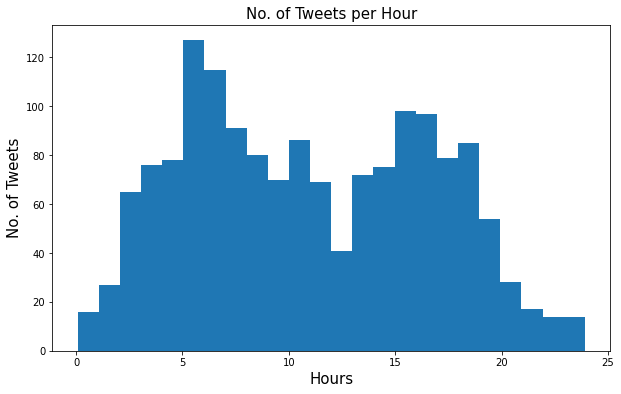

In [20]:
# Number of Tweets/Hour
plt.figure(1, figsize=(10,6))
plt.hist(df["created_at"],bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

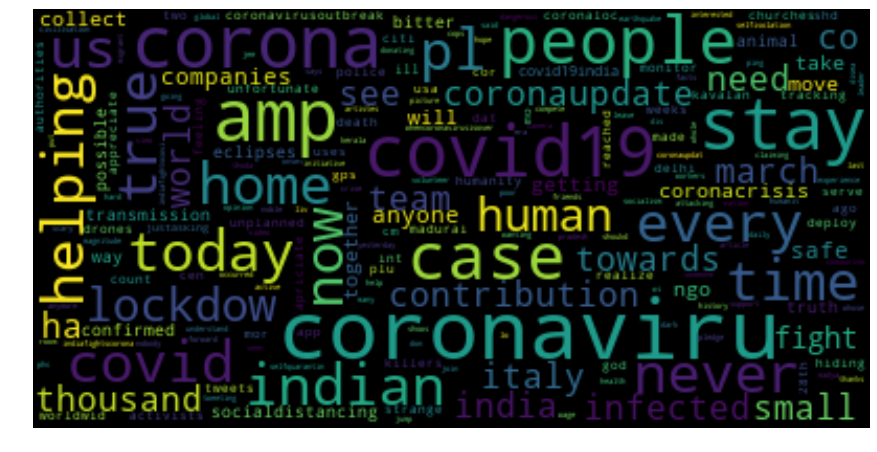

In [23]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [24]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [25]:
# removing stopwords
for i in range(df.shape[0]) :
    df['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()
df['text'].head()

0              covid19 socialdistancing the indian way
1    possible case of human to animal transmission ...
2    coronavirus us eclipses 120 000 confirmed case...
3    the bitter truth covid 19 covid19india lockdow...
4    coronavirusoutbreak all churches shd realize t...
Name: text, dtype: object

# Sentiment Analysis

In [30]:
#analysing text sentiments

df['sentiment'] = ' '
df['polarity'] = None
for i,tweets in enumerate(df.text) :
    blob = TextBlob(tweets)
    df['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        df['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        df['sentiment'][i] = 'negative'
    else :
        df['sentiment'][i] = 'neutral'
df.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity
0,0.066667,covid19 socialdistancing the indian way,10374,0,neutral,0
1,0.066667,possible case of human to animal transmission ...,22880,0,negative,-0.23125
2,0.116667,coronavirus us eclipses 120 000 confirmed case...,12968,6,positive,0.4
3,0.150000,the bitter truth covid 19 covid19india lockdow...,6,0,negative,-0.1
4,0.216667,coronavirusoutbreak all churches shd realize t...,38,0,positive,0.1375


positive    715
neutral     540
negative    319
Name: sentiment, dtype: int64


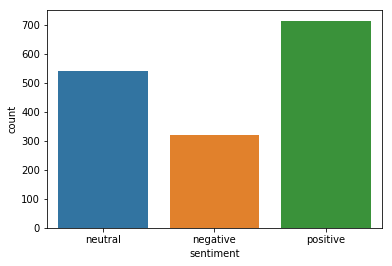

In [27]:
print(df.sentiment.value_counts())
sns.countplot(x='sentiment', data = df);

In [31]:
df.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity
0,0.066667,covid19 socialdistancing the indian way,10374,0,neutral,0
1,0.066667,possible case of human to animal transmission ...,22880,0,negative,-0.23125
2,0.116667,coronavirus us eclipses 120 000 confirmed case...,12968,6,positive,0.4
3,0.150000,the bitter truth covid 19 covid19india lockdow...,6,0,negative,-0.1
4,0.216667,coronavirusoutbreak all churches shd realize t...,38,0,positive,0.1375


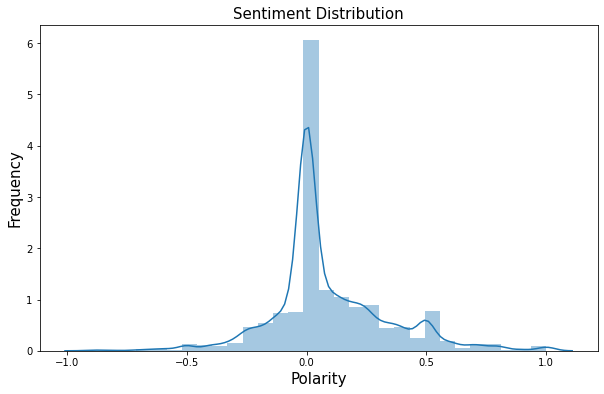

In [27]:
# Sentiment Distribution
import seaborn as sns
pol = df['polarity']
plt.figure(figsize=(10,6))
sns.distplot(pol,bins=30)
# plt.hist(pol,bins = 30 )
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

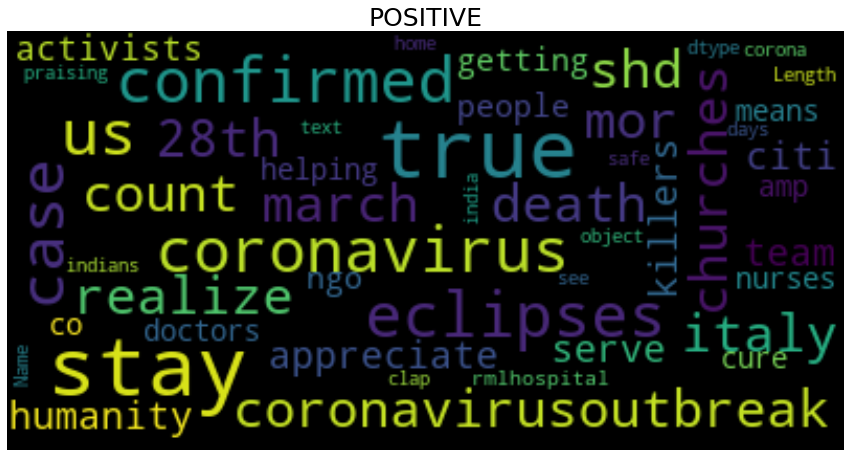

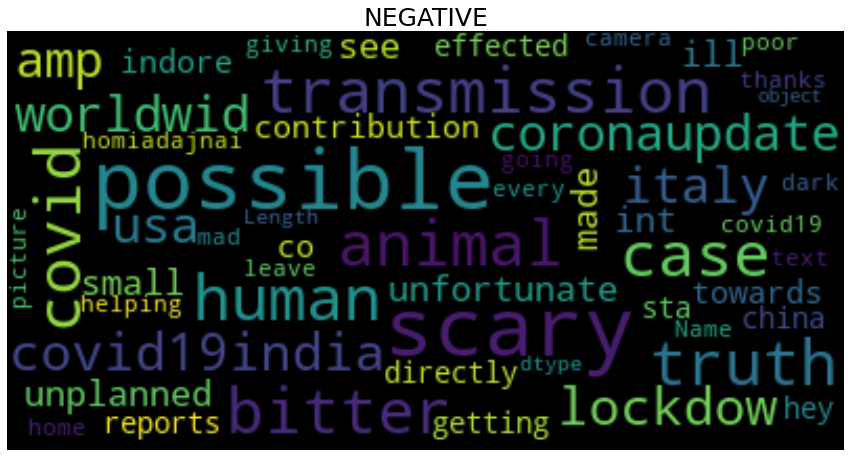

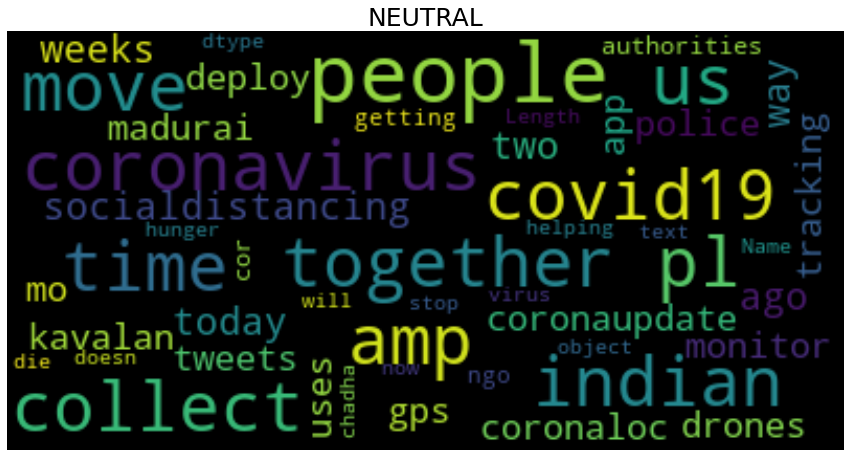

In [28]:
#Using Word Clouds to see the higher fequency words from each sentiment
pos = df['text'][df['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = df['text'][df['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df['text'][df['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [29]:
count = pd.DataFrame(df.groupby('sentiment').sum())
count.head()

,created_at,favourites_count,retweet_count
sentiment,,,
negative,3591.500000,2909393,316
neutral,5891.433333,4321731,1076
positive,7794.933333,5679841,2262


In [30]:
#Most frequently appearing words
words = []
words = [word for i in df.text for word in i.split()]

In [31]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,to,1138
1,the,1101
2,of,795
3,in,638
4,covid19,612


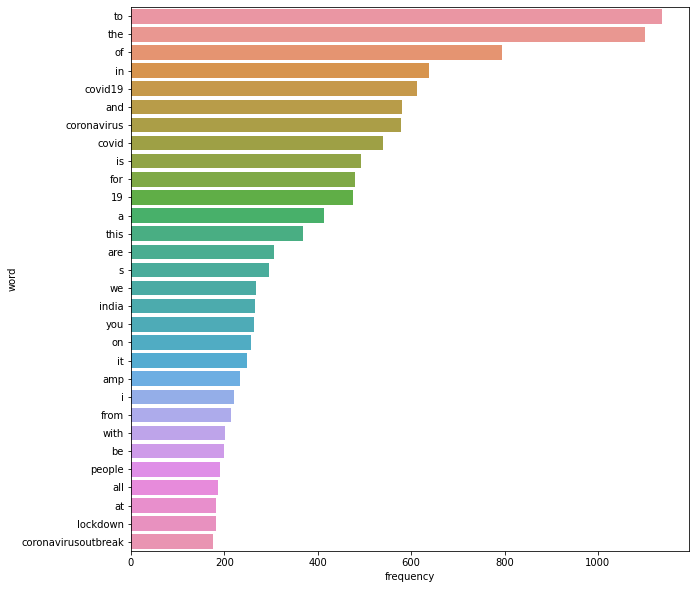

In [32]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [33]:
df.to_csv(r'C:\Users\guh\IBM_2020\df.csv',index=False)

# LATEST TWEETS SENTIMENT ANALYSIS :)

In [32]:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler('1qDZkszTvWa5ZxCbBWGDSXb9T', 'zaiBpUChxmYmGZzglfFDNE0wA7cwY3MmjKH6TigJcAIQMbXF51')
    auth.set_access_token('1250807474027769856-QZ5xhE2eJTgzwi6Yoy9LTb9iCMGqgJ', 'TG5gdkawEB3CPdshGu6mH8fLR0BU21WgDsAJ2mNfTodiq')

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [33]:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.search(q="#lockdownIndia", count=200)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
#print("3 recent tweets:\n")
for tweet in tweets[:3]:
    print(tweet.text)
    print()
extractor = twitter_setup()

Number of tweets extracted: 100.

When will this lockdown end 
#COVID19 #lockdown #lockdownindia https://t.co/63jcZceurv

If #Deewar was filmed in 2020 🙂 
#lockdown #lockdownindia https://t.co/4NmCF6sPHZ

#कडवासच #Bittertruth 
With due credits to cartoonist sharing as received #lockdownindia https://t.co/qTnPe23hyl



In [34]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,When will this lockdown end \n#COVID19 #lockdo...
1,If #Deewar was filmed in 2020 🙂 \n#lockdown #l...
2,#कडवासच #Bittertruth \nWith due credits to car...
3,ℙ𝕠𝕥𝕒𝕥𝕠 𝔽𝕖𝕟𝕦𝕘𝕣𝕖𝕖𝕜 𝕃𝕖𝕒𝕧𝕖𝕤 𝔹𝕦𝕟𝕤\n\n#lockdownindia...
4,#thekingofkhansra #changez #changezandme #lock...
5,RT @LavekarBharati: Our Volunteers Distributin...
6,RT @ShreyaR03426090: please stay at home and a...
7,"RT @NagarajuGujjeti: मंगलवार, 14 जुलाई 2020 ऑन..."
8,RT @kakoligdastidar: If Europe south Korea New...
9,RT @Scimitar_SS: He was so distraught that he ...


In [35]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [36]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1283076566767988736
2020-07-14 16:31:06
Twitter for Android
0
0
None
None
{'hashtags': [{'text': 'COVID19', 'indices': [29, 37]}, {'text': 'lockdown', 'indices': [38, 47]}, {'text': 'lockdownindia', 'indices': [48, 62]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1283076124084277248, 'id_str': '1283076124084277248', 'indices': [63, 86], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/Ec5m79PUEAA8gWt.jpg', 'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/Ec5m79PUEAA8gWt.jpg', 'url': 'https://t.co/63jcZceurv', 'display_url': 'pic.twitter.com/63jcZceurv', 'expanded_url': 'https://twitter.com/Supersmart999/status/1283076566767988736/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 498, 'h': 408, 'resize': 'fit'}, 'large': {'w': 498, 'h': 408, 'resize': 'fit'}, 'small': {'w': 498, 'h': 408, 'resize': 'fit'}}}]}


In [37]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [38]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,When will this lockdown end \n#COVID19 #lockdo...,86,1283076566767988736,2020-07-14 16:31:06,Twitter for Android,0,0
1,If #Deewar was filmed in 2020 🙂 \n#lockdown #l...,81,1283071767586594816,2020-07-14 16:12:02,Twitter for Android,1,0
2,#कडवासच #Bittertruth \nWith due credits to car...,111,1283068511263186944,2020-07-14 15:59:06,Twitter for Android,0,0
3,ℙ𝕠𝕥𝕒𝕥𝕠 𝔽𝕖𝕟𝕦𝕘𝕣𝕖𝕖𝕜 𝕃𝕖𝕒𝕧𝕖𝕤 𝔹𝕦𝕟𝕤\n\n#lockdownindia...,137,1283060781047668736,2020-07-14 15:28:22,Twitter for Android,1,1
4,#thekingofkhansra #changez #changezandme #lock...,136,1283057041184100354,2020-07-14 15:13:31,Instagram,0,0
5,RT @LavekarBharati: Our Volunteers Distributin...,143,1283055271204605953,2020-07-14 15:06:29,Twitter for iPhone,0,9
6,RT @ShreyaR03426090: please stay at home and a...,140,1283053826774269959,2020-07-14 15:00:44,Twitter for Android,0,1
7,"RT @NagarajuGujjeti: मंगलवार, 14 जुलाई 2020 ऑन...",140,1283052817389953028,2020-07-14 14:56:44,Twitter Web App,0,2
8,RT @kakoligdastidar: If Europe south Korea New...,140,1283052037681434625,2020-07-14 14:53:38,Twitter Web App,0,45
9,RT @Scimitar_SS: He was so distraught that he ...,139,1283045258918531075,2020-07-14 14:26:42,Twitter for Android,0,1


In [39]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 136.34


In [40]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
#Poll : क्या आपको लगता है सप्ताह में एक या दो दिन के लॉकडाउन से कोरोना संक्रमण को थामा जा सकता है?

#lockdownindia #coronavirus
Number of likes: 36
127 characters.

The tweet with more retweets is: 
RT @deveshkumarbjp: #EnvironmentConservation has been one of the unintended benefits of #coronavirus #lockdownindia. There is less pollutio…
Number of retweets: 84
140 characters.



In [41]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

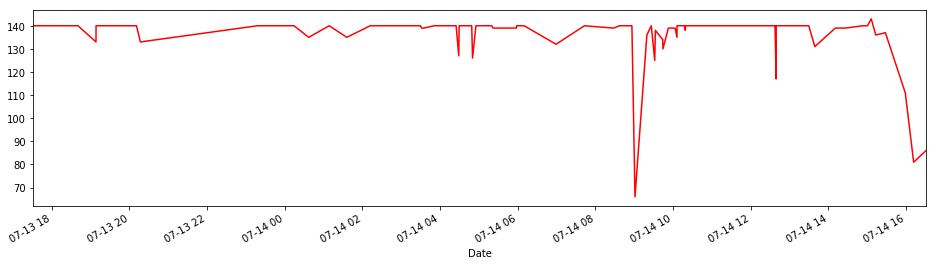

In [42]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

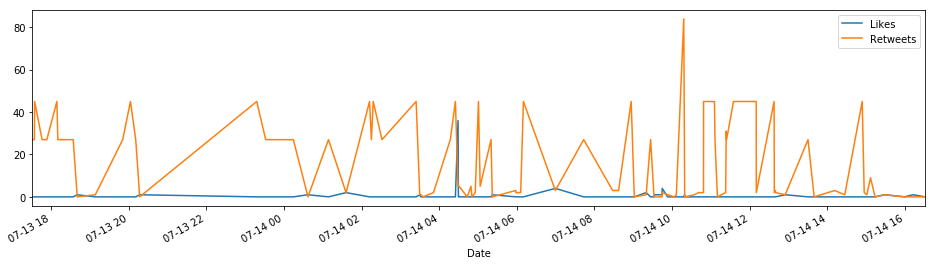

In [43]:


# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [44]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Instagram
* Twitter for iPhone
* Twitter Web App
* #COVID19
* Bhurtya1
* TweetDeck


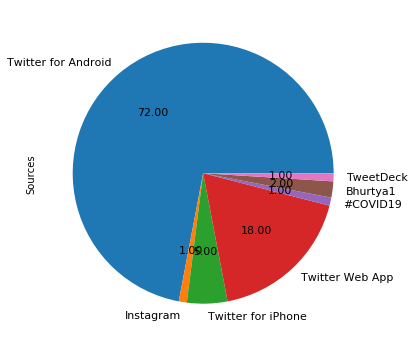

In [45]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [46]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

data['sentiment'] = ' '
data['polarity'] = None
for i,tweets in enumerate(data.Tweets) :
    blob = TextBlob(tweets)
    data['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        data['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        data['sentiment'][i] = 'negative'
    else :
        data['sentiment'][i] = 'neutral'
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs,sentiment,polarity
0,When will this lockdown end \n#COVID19 #lockdo...,86,1283076566767988736,2020-07-14 16:31:06,Twitter for Android,0,0,neutral,0
1,If #Deewar was filmed in 2020 🙂 \n#lockdown #l...,81,1283071767586594816,2020-07-14 16:12:02,Twitter for Android,1,0,neutral,0
2,#कडवासच #Bittertruth \nWith due credits to car...,111,1283068511263186944,2020-07-14 15:59:06,Twitter for Android,0,0,negative,-0.125
3,ℙ𝕠𝕥𝕒𝕥𝕠 𝔽𝕖𝕟𝕦𝕘𝕣𝕖𝕖𝕜 𝕃𝕖𝕒𝕧𝕖𝕤 𝔹𝕦𝕟𝕤\n\n#lockdownindia...,137,1283060781047668736,2020-07-14 15:28:22,Twitter for Android,1,1,neutral,0
4,#thekingofkhansra #changez #changezandme #lock...,136,1283057041184100354,2020-07-14 15:13:31,Instagram,0,0,neutral,0


neutral     61
positive    34
negative     5
Name: sentiment, dtype: int64

	    Sentiment Analysis for Latest data


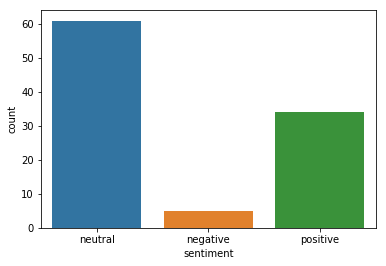

In [47]:
print(data.sentiment.value_counts())
sns.countplot(x='sentiment', data = data);
print("\n\t    Sentiment Analysis for Latest data")